In [119]:
from scipy.integrate import quad, solve_ivp

# Part 1: Surface Pressure vs radius



 For the moment, assume that the gas density inside the sphere is uniform.
    Use the virial theorem to derive a relationship between $P_{\mathrm{s}}$
    and the cloud radius $R$. 
    Recall:
    $$\frac{1}{2}\ddot{I} = 2 (\mathcal{T} - \mathcal{T}_S) + \mathcal{W}$$
    $\mathcal{T}_S$ is the average surface pressure, given by
    $$\mathcal{T}_S = \int_S r P dS = r P \int_S dS = 4 \pi R^2 R P_S = 4 \pi R^3 P_S$$
    assuming a sphere with a constant surface pressure term. 
    
 

$\mathcal{W}$ is the gravitational potential
 $$\mathcal{W} = -a \frac{GM^2}{R}$$


### Solution

$$2 (\mathcal{T} - \mathcal{T}_S) + \mathcal{W} = 0$$

$$2\left( \frac{3}{2} M c_s^2 - 4 \pi R^3 P_S\right) - a \frac{GM^2}{R} = 0$$

$$\left( 3 M c_s^2 - 8 \pi R^3 P_S\right) - a \frac{GM^2}{R} = 0$$

$$P_S = \frac{a GM^2}{8 \pi R^4 } - \frac{3 M c_s^2}{8 \pi R^3} = \frac{1}{8 \pi R^3} \left(3 M c_s^2 - \frac{a G M^2}{R}\right)$$

for $a=3/5$, 
$$P_S = \frac{3 GM^2}{40 \pi R^4 } - \frac{3 M c_s^2}{8 \pi R^3} = \frac{1}{8 \pi R^3} \left(3 M c_s^2 - \frac{3 G M^2}{5 R}\right)
 = \frac{3}{8 \pi R^3} \left( M c_s^2 - \frac{ G M^2}{5 R}\right) = \frac{3 M c_s^2}{8 \pi} \left( \frac{1}{R^3} - \frac{ G M}{5 c_s^2} \frac{1}{R^4}\right)$$

# Part 2: Maximum surface pressure

Show that there is a maximum surface pressure $P_{\mathrm{s,max}}$ for
    which virial equilibrium is possible and derive its value.
    (find an extremum of $P_S(R)$ with respect to $R$)


$$\frac{d P_S}{dR} = \frac{a GM^2}{2 \pi R^5 } - \frac{9 M c_s^2}{8 \pi R^4} = 0$$

$$\frac{a GM^2}{2 \pi } - \frac{9 M c_s^2 R }{8 \pi} = 0$$

$$R(P_{S,max}) = \frac{4 a GM}{9 c_s^2 }$$

for $a=\frac{3}{5}$,
$$R(P_{S,max}) = \frac{4  GM}{15 c_s^2 }$$

$$P_{S,max} = -\frac{a G M^2}{8 \pi} \left(\frac{9 c_s^2}{4 a G M}\right)^4 + \frac{3 M c_s^2}{8\pi} \left(\frac{9 c_s^2}{4 a G M}\right)^3$$

$$P_{S,max} = -\frac{3^8 c_s^8 }{2^{11} G^3 M^2 a^3 \pi} + \frac{3^7 c_s^8}{2^9 M^2 G^3 \pi a^3} $$

$$P_{S,max} = \left(\frac{3^7}{2^9} - \frac{3^8}{2^{11}}\right) \frac{c_s^8}{\pi a^3 G^3 M^2} $$

In [120]:
-(3**8/2**11-3**7/2**9)

1.06787109375

$$P_{S,max} = 1.07 \frac{c_s^8}{\pi a^3 G^3 M^2} $$

In [121]:
-(3**8/2**11-3**7/2**9) / (3/5.)**3

4.943847656250001

$$P_{S,max} = 4.94 \frac{c_s^8}{\pi G^3 M^2} $$

In [122]:
psmax_scale = -(3**8/2**11-3**7/2**9) / (3/5.)**3 / np.pi
psmax_scale

1.573675584770938

$$P_{S,max} = 1.574 \frac{c_s^8}{G^3 M^2} $$

# Part 3: Density Structure

Now we will compute the true density structure. Consider first the equation of hydrostatic balance,
$$-\frac{1}{\rho}\frac{d}{dr} P = \frac{d}{dr} \phi$$
where $P = \rho c_s^2$ is the pressure and $\phi$ is the gravitational
potential. Let $\rho_c$ be the density at $r=0$, and choose a solution such that
$\phi = 0$ at $r=0$. Integrate the equation of hydrostatic balance to obtain an
expression relating $\rho$, $\rho_c$, and $\phi$.

(recall: $\frac{d }{dx}\left(\ln y(x)\right) = \frac{1}{y} \frac{d y}{dx}$)



$$P = \rho c_s^2$$
$$-\frac{1}{\rho} \frac{d}{dr} \rho c_s^2 = \frac{d}{dr}\phi$$

$$-c_s^2 \frac{d}{dr} \ln \rho = \frac{d}{dr}\phi$$

$$-c_s^2 \ln \rho = \phi + C$$
$$\rho = e^{-\phi/c_s^2+C} = C e^{-\phi/c_s^2}$$

$$\rho(r=0) = C e^{0} = \rho_c$$
$$C = \rho_c $$

$$\rho =  \rho_c e^{-\phi/c_s^2}$$

# Part 4: Poisson equation - derive nondimensional isothermal Lane-Emden Equation

Now consider the Poisson equation for the potential,
$$\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) = 4 \pi G \rho$$
Use your result from the previous part to eliminate $\rho$, and define $\psi \equiv \phi/c_s^2$. Show that the resulting equation can be non-dimensionalized to give the isothermal Lane-Emden equation:
$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) = e^{-\psi}.
$$
where $\xi = r/r_0$. What value of $r_0$ is required to obtain this equation?



#### Substitute  $\xi = r/r_0$
into
$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) = e^{-\psi}$$

$$\frac{r_0^2}{r^2}\frac{r_0 d}{dr}\left(\left(\frac{r}{r_0}\right)^2 \frac{r_0 d\psi}{dr}\right) = e^{-\psi}$$

$$r_0^2 \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\psi}{dr}\right) = e^{-\psi}$$

substitute $\psi = \frac{\phi}{c_s^2}$
$$\frac{r_0^2}{c_s^2} \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) = e^{-\phi/c_s^2}$$

substitute $\rho =  \rho_c e^{-\phi/c_s^2}$
$$\frac{r_0^2}{c_s^2} \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) = \frac{\rho}{\rho_c}$$

Rearrange
$$ \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) =\frac{c_s^2}{r_0^2} \frac{\rho}{\rho_c}$$

By symmetry, then, we have

$$ \frac{c_s^2}{\rho_c r_0^2} = 4 \pi G$$

which rearranges to
$$ r_0 = \sqrt{\frac{c_s^2}{\rho_c 4 \pi G}}$$

# Part 5: Numerical Integration

$$\frac{1}{r^2} \frac{d}{dr} \left(r^2 \frac{d \psi}{dr}\right) = e^{-\psi}$$

Eqn 1:

$$ \psi ' = \frac{d\psi}{dr} $$
$$\frac{d \psi '}{dr} = -2\frac{\psi '}{r} + e^{-\psi}$$

Boundary conditions:  $\psi = 0$, $\frac{d\psi}{dr} = 0$ at $r=0$

$$\psi = a_0 + a_1 z + a_2 z^2 + a_3 z^3 + ...$$ near $r=0$

We get $a_0=0$ and $a_1=0$ from the boundary conditions $\phi(0)=\phi'(0)=0$

Near $r=$ zero, then:
    
$$\frac{d\psi}{dr} = 2 a_2 r + 3 a_3 r^2$$
$$\frac{d^2\psi}{dr^2} = 2 a_2 + 6 a_3 r$$


$$\frac{1}{r^2} \frac{d}{dr}\left(r^2 (2 a_2 r + 3 a_3 r^2) \right) = e^{\psi}$$

$$\frac{1}{r^2} \frac{d}{dr}\left( 2 a_2 r^3 + 3 a_3 r^4 \right) = e^{\psi}$$

$$\frac{1}{r^2} \left(6 a_2 r^2 + 12 a_3 r^3 \right) = e^{\psi}$$

$$ \left(6 a_2 + 12 a_3 r \right) = e^{\psi} = 1 $$

using $r=0$:
$$ 6 a_2  = 1 $$ so $$a_2 = 1/6$$

plugging in a_2, we get
$$ \left(1 + 12 a_3 r \right)  = 1 $$
$$ a_3 r = 0 $$
which I guess gives us $a_3=0$?

Our boundary condition for $\psi'$ gives
$\psi'(x) = 2 a_2 x = x / 3$

For $\psi$, we get $\psi(x) = a_2 x^2 = x^2 / 6$

In [123]:
def derivatives(x, y):
    # y[0] = psi
    # y[1] = psi'
    return [y[1], -2*y[1]/x + np.exp(-y[0])]

integral_start = 0.000001
integral_stop = 25
psi0 = integral_start**2 / 6
psiprime0 = integral_start / 3

sol = solve_ivp(derivatives,
                t_span=(integral_start, integral_stop),
                y0=[psi0, psiprime0],
                t_eval=np.linspace(integral_start, integral_stop, 100),
               )
sol.success, sol.message

(True, 'The solver successfully reached the end of the integration interval.')

In [124]:
def contrast(psi):
    return np.exp(-psi)

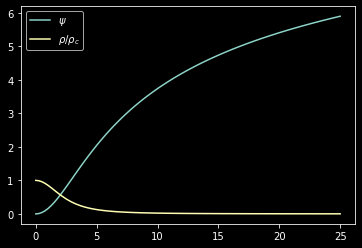

In [125]:
pl.plot(sol.t, sol.y[0], label='$\psi$')
pl.plot(sol.t, contrast(sol.y[0]), label='$\\rho/\\rho_c$')
pl.legend(loc='best')

# Part 6: Enclosed Mass

The total mass enclosed out to a radius $R$ is
$$
M = 4\pi \int_0^R \rho r^2 \, dr.
$$
Show that this is equivalent to
$$
M =\frac{c_s^4}{\sqrt{4\pi G^3 P_s}} \left(e^{-\psi/2}\xi^2 \frac{d\psi}{d\xi}\right)_{\xi_s},
$$
where
$$\xi_s \equiv \frac{R}{r_0} $$
$$P_s \equiv  \rho_s c_s^2$$

$P_s$ is the pressure at the surface, and the pressure contrast is the same as the density contrast $$\frac{P}{P_c} = \frac{\rho}{\rho_c} = e^\psi$$
Hint: to evaluate the integral, it is helpful to use the isothermal Lane-Emden equation to substitute.



False start:

Start with 

$$\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) = 4 \pi G \rho$$
$$\rho = \frac{1}{4\pi G}\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) $$



$$M = 4\pi \int_0^R \rho r^2 \, dr$$
$$M = 4\pi \int_0^R \frac{1}{4\pi G}\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right) r^2 \, dr$$

$$M = \frac{1}{G} \int_0^R   \frac{d}{dr}\left(r^2 \frac{d\phi}{dr}\right)  \, dr$$

$$M = \frac{1}{G} \left(r^2 \frac{d\phi}{dr}\right)_0^R$$

$$M = \frac{1}{G} \left(r^2 \frac{d\phi}{dr}\right)_0^R$$

Alternatively,

$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) = e^{-\psi} = e^{-\phi/c_s^2} = \rho/\rho_c$$

$$M = 4\pi \int_0^R \rho_c \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) r^2 \, dr$$


$$M = 4\pi \int_0^{\xi_S} \rho_c \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) (r_0 \xi)^2 \, d(r_0 \xi)$$


$$M = 4\pi r_0^3 \rho_c \int_0^{\xi_S}  \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) \xi^2 \, d\xi$$


$$M = 4\pi r_0^3 \rho_c \int_0^{\xi_S} \frac{d}{d\xi}\left(\xi^2 \frac{d\psi}{d\xi}\right) \, d\xi$$


$$M = 4\pi r_0^3 \rho_c \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$$ r_0 = \sqrt{\frac{c_s^2}{\rho_c 4 \pi G}}$$

$$M = 4\pi \frac{c_s^3}{(4 \pi G \rho_c)^{3/2}} \rho_c \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$$M = \frac{c_s^3}{(4 \pi \rho_c G^3 )^{1/2}} \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$\rho_S = \rho_c e^{-\psi}$ evaluated at the surface
$$P_S=\rho_S c_s^2 = \rho_c c_s^2 e^{-\psi}$$
$$\rho_c = P_S c_s^{-2} e^\psi$$

$$M = \frac{c_s^3}{(4 \pi  P_S c_s^{-2} e^\psi G^3 )^{1/2}} \left(\xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


$$M = \frac{c_s^4}{(4 \pi  P_S  G^3 )^{1/2}} \left( e^{-\psi/2} \xi^2 \frac{d\psi}{d\xi}\right)_0^{\xi_S} $$


# Part 7: Dimensionless Mass
Plot the dimensionless mass $m = M/(c_s^4/\sqrt{G^3 P_s})$ versus the dimensionless density contrast $\rho_c/\rho_s=e^{-\psi_s}$, where $\psi_s$ is the value of $\psi$ at $\xi=\xi_s$. You will see that $m$ reaches a finite maximum value $m_{\mathrm{max}}$ at a particular value of $\rho_c/\rho_s$. Numerically determine $m_{\mathrm{max}}$, along with the density contrast $\rho_c/\rho_s$ at which it occurs.


$m = M/(c_s^4/\sqrt{G^3 P_s})$ versus the dimensionless density contrast $\rho_c/\rho_s=e^{-\psi_s}$

In [126]:
def mass(z, psi, psiprime):
    return 1/(4*np.pi)**0.5 * np.exp(-psi/2) * z**2 * psiprime

We use inverse contrast here because the contrast is defined as 

$\frac{\rho}{\rho_c} = e^\psi$

but we're now asing for the inverse density contrast

$\frac{\rho_c}{\rho_S} = e^{-\psi}$

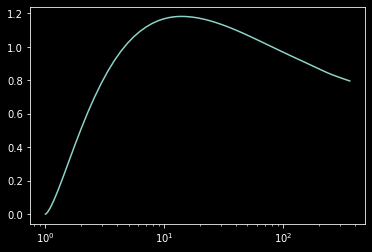

In [127]:
pl.semilogx(contrast(sol.y[0])**-1,
            mass(sol.t, sol.y[0], sol.y[1]))

In [128]:
maxmass=mass(sol.t, sol.y[0], sol.y[1]).max()
print(f"M_max = {maxmass}")
maxcontrast = contrast(sol.y[0])[np.argmax(mass(sol.t, sol.y[0], sol.y[1]))]**-1
print(f"max contrast: {maxcontrast}")

M_max = 1.1821156611725328
max contrast: 14.646879149944354


# Part 8: Pressure for max mass

The existence of a finite maximum $m$ implies that, for a given dimensional mass $M$, there is a maximum surface pressure $P_s$ at which a cloud of that mass can be in hydrostatic equilibrium. Solve for this maximum, and compare your result to the result you obtained in part (a).


$m = M/(c_s^4/\sqrt{G^3 P_{S,max,BE}})$

$$\frac{M}{m} = \frac{c_s^4}{\sqrt{G^3 P_{S,max,BE}}}$$

$$P_{S,max,BE} = \left(\frac{m}{M}\right)^2 c_s^8 G^{-3} = \frac{m^2 c_s^8}{G^3 M^2}$$ 

$$P_{S,max,sphere} = \left(\frac{3^7}{2^9} - \frac{3^8}{2^{11}}\right) \frac{c_s^8}{\pi a^3 G^3 M^2}
 = 1.574 \frac{c_s^8}{G^3 M^2} $$

$$P_{S,max,sphere} = \frac{1.574 }{m^2} P_{S,max,BE}$$

In [129]:
maxmass**2

1.3973974363893742

$$P_{S,max,BE} = 1.397 \frac{c_s^8}{G^3 M^2}$$ 

In [130]:
ratio_psmax_BE_to_sphere = psmax_scale / maxmass**2
ratio_psmax_BE_to_sphere 

1.1261474679938122

$$P_{S,max,sph} = 1.126 P_{S,max,BE}$$

# Part 9: BE Mass

Conversely, for a given surface pressure $P_s$ and sound speed $c_s$ there exists a maximum mass at which the cloud can be in hydrostatic equilibrium, called the Bonnor-Ebert mass $M_{\mathrm{BE}}$. Obtain an expression for $M_{\mathrm{BE}}$ in terms of $P_s$ and $c_s$. In a typical low-mass star-forming region, the surface pressure on a core might be $P_{\mathrm{s}}/k_{\rm B} = 3\times 10^5$ K cm$^{-3}$. Compute this mass for a core with a temperature of 10 K, assuming the standard mean molecular weight $\mu=2.3$.


$$M = m \frac{c_s^4}{\sqrt{G^3 P_{S,max,BE}}}$$

In [131]:
maxmass

1.1821156611725328

$$M = 1.18 \frac{c_s^4}{\sqrt{G^3 P_{S,max,BE}}}$$

$$c_s = \sqrt{ \frac{k_B T}{m_{H_2}} }$$

$$M = 1.18 \frac{k_B^2 T^2}{m_{H_2}^2\sqrt{G^3 P_{S,max,BE}}}$$

$T=10$ K

$P = 3\times10^5 K k_B$

$k_B = 1.38e-16$

$$M = 1.18 \frac{k_B^2 T^2}{m_{H_2}^2\sqrt{G^3 P_{S,max,BE}}}$$

$G = 6.67e-8$

In [132]:
from astropy import units as u, constants

In [133]:
constants.G.cgs

<Quantity 6.6743e-08 cm3 / (g s2)>

In [134]:
M_BE = 1.18 * (constants.k_B * 10*u.K)**2 / (2.3*u.Da)**2 / (constants.G.cgs**(3./2.)) / (3e5*u.K * constants.k_B * u.cm**-3)**0.5
M_BE.to(u.M_sun)

<Quantity 0.6988403 solMass>

In [135]:
M_BE = 1.18 * (1.38e-16 * 10)**2 / (2.3 * 1.67e-24)**2 / (6.67e-8)**(3/2) / (3e5 * 1.38e-16)**0.5
M_BE / 2e33

0.6871200932612178

Consider instead a high-pressure environment like the Central Molecular Zone or a high-redshift galaxy.

In such environments, the pressure is $P_S\sim10^7$ K cm$^{-3}$ k$_B$ and temperature $T\sim50$K

In [136]:
M_BE = 1.18 * (constants.k_B * 50*u.K)**2 / (2.3*u.Da)**2 / (constants.G.cgs**(3./2.)) / (1e7*u.K * constants.k_B * u.cm**-3)**0.5
M_BE.to(u.M_sun)

<Quantity 3.02606726 solMass>